In [1]:
import pandas as pd

In [218]:
drugdeaths = pd.read_csv("./data/Accidental_Drug_Related_Deaths_2012-2018.csv")
for c in drugdeaths.columns: print ("'%s'" % c)

'ID'
'Date'
'DateType'
'Age'
'Sex'
'Race'
'ResidenceCity'
'ResidenceCounty'
'ResidenceState'
'DeathCity'
'DeathCounty'
'Location'
'LocationifOther'
'DescriptionofInjury'
'InjuryPlace'
'InjuryCity'
'InjuryCounty'
'InjuryState'
'COD'
'OtherSignifican'
'Heroin'
'Cocaine'
'Fentanyl'
'FentanylAnalogue'
'Oxycodone'
'Oxymorphone'
'Ethanol'
'Hydrocodone'
'Benzodiazepine'
'Methadone'
'Amphet'
'Tramad'
'Morphine_NotHeroin'
'Hydromorphone'
'Other'
'OpiateNOS'
'AnyOpioid'
'MannerofDeath'
'DeathCityGeo'
'InjuryCityGeo'
'ResidenceCityGeo'


In [219]:
drugdeaths.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,InjuryCityGeo,ResidenceCityGeo
0,12-0001,01/01/2012 12:00:00 AM,DateofDeath,35.0,Male,White,HEBRON,TOLLAND,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HEBRON, CT\n(41.658069, -72.366324)",NaN,"HEBRON\n(43.694742, -71.808963)"
1,12-0002,01/03/2012 12:00:00 AM,DateofDeath,41.0,Male,White,BRISTOL,HARTFORD,NaN,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Bristol, CT\n(41.673037, -72.945791)",NaN,"BRISTOL\n(41.673037, -72.945791)"
2,12-0003,01/04/2012 12:00:00 AM,DateofDeath,61.0,Male,Black,DANBURY,FAIRFIELD,NaN,DANBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Danbury, CT\n(41.393666, -73.451539)",NaN,"DANBURY\n(41.393666, -73.451539)"
3,12-0004,01/05/2012 12:00:00 AM,DateofDeath,51.0,Male,White,STRATFORD,FAIRFIELD,NaN,BRIDGEPORT,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"BRIDGEPORT, CT\n(41.179195, -73.189476)",NaN,"STRATFORD\n(41.200888, -73.131323)"
4,12-0005,01/07/2012 12:00:00 AM,DateofDeath,45.0,Male,White,HARTFORD,HARTFORD,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\n(41.765775, -72.673356)",NaN,"HARTFORD\n(41.765775, -72.673356)"


# Create a year column

In [220]:
drugdeaths["DateType"].value_counts()

DateofDeath     2822
DateReported    2281
Name: DateType, dtype: int64

In [221]:
from datetime import datetime

def get_year(datestr):

    if pd.isnull(datestr): return datestr
    return int(datetime.strptime(datestr[:10],"%m/%d/%Y").year)

#print (get_year("01/07/2012 12:00:00 AM"))
drugdeaths["year"] = drugdeaths["Date"].apply(get_year)

In [222]:
# get year another way -- infer it from the ID
def get_year_2(idstr):
    return 2000 + int(idstr[:2])

drugdeaths["year_2"] = drugdeaths["ID"].apply(get_year_2)

In [223]:
drugdeaths[drugdeaths["Date"].isnull()]

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,InjuryCityGeo,ResidenceCityGeo,year,year_2
2132,15-0728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)",NaN,NaN,NaN,2015
2133,15-0729,NaN,NaN,28.0,Male,White,NaN,NaN,NaN,NaN,...,NaN,2-A,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)","STRATFORD, CT\n(41.200888, -73.131323)",NaN,NaN,2015


In [224]:
drugdeaths["year_2"].value_counts()

2017    1038
2018    1018
2016     917
2015     729
2014     558
2013     490
2012     355
Name: year_2, dtype: int64

In [225]:
drugdeaths["year"].value_counts()

2017.0    1038
2018.0    1018
2016.0     917
2015.0     727
2014.0     558
2013.0     490
2012.0     355
Name: year, dtype: int64

In [226]:
drugdeaths[drugdeaths["year_2"].isnull()]

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,InjuryCityGeo,ResidenceCityGeo,year,year_2


In [227]:
drugdeaths[drugdeaths["year"].isnull()]

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,InjuryCityGeo,ResidenceCityGeo,year,year_2
2132,15-0728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)",NaN,NaN,NaN,2015
2133,15-0729,NaN,NaN,28.0,Male,White,NaN,NaN,NaN,NaN,...,NaN,2-A,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)","STRATFORD, CT\n(41.200888, -73.131323)",NaN,NaN,2015


# Create fewer race categories
Group into white, black, hispanic any, and other

In [228]:
drugdeaths["Race"].value_counts()

White                     4004
Hispanic, White            561
Black                      433
Hispanic, Black             24
Unknown                     23
Asian, Other                18
Asian Indian                14
Other                       11
Chinese                      2
Native American, Other       1
Hawaiian                     1
Name: Race, dtype: int64

In [229]:
drugdeaths["Race"].value_counts().sum()

5092

In [230]:
def race_4(racestr):
    if pd.isnull(racestr): return "other"
    tmp = str(racestr).strip().lower()
    
    if tmp == "white": return "white"
    if tmp == "black": return "black"
    if tmp.startswith("hispanic"): return "hispanic"
    return "other"

drugdeaths["race_4"] = drugdeaths["Race"].apply(race_4)


In [231]:
drugdeaths["race_4"].value_counts()

white       4004
hispanic     585
black        433
other         83
Name: race_4, dtype: int64

In [232]:
561 + 24

585

In [233]:
drugdeaths["race_4"].value_counts().sum()

5105

In [234]:
drugdeaths.to_csv("data/drug-deaths-with-race-and-year-columns.csv")

# Check annual totals against published summaries

In [204]:
drugdeaths.groupby(["year"]).agg({"ID":np.size})

,ID
year,
2012.0,355
2013.0,490
2014.0,558
2015.0,727
2016.0,917
2017.0,1038
2018.0,1018


In [205]:
# Now group by year, race

In [206]:
import numpy as np
race_year = drugdeaths.groupby(["year","race_4"]).agg({"ID":np.size})
race_year

ID
year   race_4       
2012.0 black      38
       hispanic   38
       other       5
       white     274
2013.0 black      44
       hispanic   52
       other       6
       white     388
2014.0 black      27
       hispanic   57
       other       6
       white     468
2015.0 black      46
       hispanic   79
       other       9
       white     593
2016.0 black      86
       hispanic  101
       other      19
       white     711
2017.0 black      88
       hispanic  122
       other      15
       white     813
2018.0 black     104
       hispanic  136
       other      22
       white     756

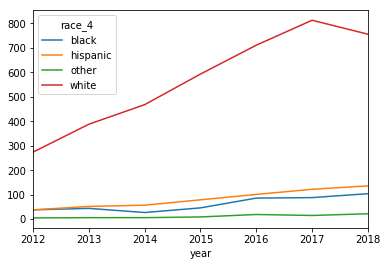

In [207]:
import matplotlib
%matplotlib inline 
pd.pivot_table(race_year.reset_index(),
              values="ID",columns="year",index="race_4").transpose().plot()

In [208]:
drugdeaths[(drugdeaths["Fentanyl"] == "Y") | (drugdeaths["FentanylAnalogue"] == "Y")]["year_2"].value_counts()

2018    760
2017    677
2016    482
2015    186
2014     75
2013     36
2012     13
Name: year_2, dtype: int64

In [209]:
fendeaths = drugdeaths[(drugdeaths["Fentanyl"] == "Y") | (drugdeaths["FentanylAnalogue"] == "Y")]
fendeaths["year_2"].value_counts()

2018    760
2017    677
2016    482
2015    186
2014     75
2013     36
2012     13
Name: year_2, dtype: int64

# Adjust for population makeup


In [210]:
def get_pop(year):
    
    yr = (str(year)[2:])
    
    fname = "./data/pop/ACS_%s_5YR_B03002/ACS_%s_5YR_B03002_with_ann.csv" % (yr, yr)
    frame = pd.read_csv(fname, skiprows=1)

    cols = {
        "white": "Estimate; Not Hispanic or Latino: - White alone",
        "black": "Estimate; Not Hispanic or Latino: - Black or African American alone",
        "hispanic": "Estimate; Hispanic or Latino:",
        "total":"Estimate; Total:"
    }
    
    for c in cols.keys():
        frame[c] = frame[cols[c]]
        
    frame["year"] = year
    ret = frame[cols.keys()]
    ret["year"] = year
    return ret.set_index("year")
        
    #for c in frame.columns: print (c)
#     total = frame.iloc[0]#["Estimate; total:"]
    
#     return total

get_pop(2012)

/Users/jakekara/Code/pandas3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,white,black,hispanic,total
year,,,,
2012,2542435,333894,480185,3572213


In [235]:
def get_all_pops():
    frames = []
    for y in range(2012, 2018):
        frames.append(get_pop(y))
        
    ret = pd.concat(frames)
    ret["other"] = ret["total"] - ret["white"] - ret["black"] - ret["hispanic"]
    ret = ret.transpose()
    ret[2018] = ret[2017]

    return ret

get_all_pops().to_csv("data/pop-est-by-race.csv")

/Users/jakekara/Code/pandas3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [212]:
# def get_latest_pop(year):
    
#     pops = get_all_pops()
    
#     ret = pops[pops.index <= year].sort_index(ascending=False).head(1)
    
#     return ret

# get_latest_pop(2018)

In [213]:
get_all_pops()#.transpose()

/Users/jakekara/Code/pandas3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


year,2012,2013,2014,2015,2016,2017,2018
white,2542435,2526401,2508360,2487119,2464450,2446049,2446049
black,333894,337758,342043,346206,347674,350820,350820
hispanic,480185,496939,512795,526508,537728,551916,551916
total,3572213,3583561,3592053,3593222,3588570,3594478,3594478
other,215699,222463,228855,233389,238718,245693,245693


In [214]:
pd.pivot_table(race_year.reset_index(),
              values="ID",columns="year",index="race_4")

year,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
race_4,,,,,,,
black,38,44,27,46,86,88,104
hispanic,38,52,57,79,101,122,136
other,5,6,6,9,19,15,22
white,274,388,468,593,711,813,756


In [215]:
fen_deaths_by_year_and_race = pd.pivot_table(fendeaths.groupby(["year_2","race_4"]).agg({'ID':np.size}).reset_index(),
                             values="ID",columns="year_2",index="race_4").reset_index()
fen_deaths_by_year_and_race = fen_deaths_by_year_and_race.set_index("race_4").join(get_all_pops(),rsuffix="_pop")
fen_deaths_by_year_and_race#.reset_index().set_index("race_4")

/Users/jakekara/Code/pandas3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,2012,2013,2014,2015,2016,2017,2018,2012_pop,2013_pop,2014_pop,2015_pop,2016_pop,2017_pop,2018_pop
race_4,,,,,,,,,,,,,,
black,NaN,4.0,4.0,8.0,32.0,55.0,79.0,333894,337758,342043,346206,347674,350820,350820
hispanic,1.0,6.0,9.0,21.0,62.0,80.0,102.0,480185,496939,512795,526508,537728,551916,551916
other,NaN,1.0,1.0,4.0,8.0,9.0,16.0,215699,222463,228855,233389,238718,245693,245693
white,12.0,25.0,61.0,153.0,380.0,533.0,563.0,2542435,2526401,2508360,2487119,2464450,2446049,2446049


In [216]:
for year in range(2012, 2019):
    fen_deaths_by_year_and_race["%d_adj" % year] = fen_deaths_by_year_and_race[str(year)] * 100000 / fen_deaths_by_year_and_race["%d_pop" % year]
fen_deaths_by_year_and_race

,2012,2013,2014,2015,2016,2017,2018,2012_pop,2013_pop,2014_pop,...,2016_pop,2017_pop,2018_pop,2012_adj,2013_adj,2014_adj,2015_adj,2016_adj,2017_adj,2018_adj
race_4,,,,,,,,,,,,,,,,,,,,,
black,NaN,4.0,4.0,8.0,32.0,55.0,79.0,333894,337758,342043,...,347674,350820,350820,NaN,1.184280,1.169444,2.310763,9.204024,15.677555,22.518671
hispanic,1.0,6.0,9.0,21.0,62.0,80.0,102.0,480185,496939,512795,...,537728,551916,551916,0.208253,1.207392,1.755087,3.988543,11.529993,14.494959,18.481073
other,NaN,1.0,1.0,4.0,8.0,9.0,16.0,215699,222463,228855,...,238718,245693,245693,NaN,0.449513,0.436958,1.713877,3.351235,3.663108,6.512192
white,12.0,25.0,61.0,153.0,380.0,533.0,563.0,2542435,2526401,2508360,...,2464450,2446049,2446049,0.471988,0.989550,2.431868,6.151696,15.419262,21.790242,23.016710
